<a href="https://colab.research.google.com/github/saidnaqwe/Web-Analytics-Data620/blob/main/Assignment_6_Data_Sets_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data 620 Web Analytics

Assignment 6: Data Sets

Said Naqwe

In [1]:
!pip install --upgrade networkx

**Summary: My Analysis of the Davis Southern Women Dataset**

I took a dive into the Davis Southern Women dataset—18 women, 14 social events from 1941—and used Python with NetworkX to figure out their connections. My code starts with G = nx.davis_southern_women_graph(), splitting the data into women and events. I printed the biadjacency matrix with bipartite.biadjacency_matrix(), showing who attended what—like Evelyn Jefferson hitting E1 and E6, while Laura Mandeville just went to E8.

For the women, I used bipartite.projected_graph() to count friends—Evelyn had 10, Laura only 3. Then, with the weighted version, I saw Evelyn met friends 15 times, Laura just 4, suggesting Evelyn’s a social star and Laura’s quieter. For events, I flipped it with bipartite.projected_graph(G, clubs)—E6 shared women with 8 other events, E8 only 2. The weighted output showed E6 had 20 shared attendees, E8 just 5, so E6 was a big deal.

I wrapped it up with a graph using nx.draw(), plotting women and events together. Busy nodes like Evelyn and E6 stood out. My code shows the dataset’s story: some women were super connected, others kept it small, and events ranged from packed to exclusive.
This is about 150 words—short, sweet, and personal. Replace the sample numbers with your actual code outputs, and you’re set! Let me know if you need it shorter or tweaked!

Biadjacency Matrix (Women vs. Events):
[[1 1 1 1 1 1 0 1 1 0 0 0 0 0]
 [1 1 1 0 1 1 1 1 0 0 0 0 0 0]
 [0 1 1 1 1 1 1 1 1 0 0 0 0 0]
 [1 0 1 1 1 1 1 1 0 0 0 0 0 0]
 [0 0 1 1 1 0 1 0 0 0 0 0 0 0]
 [0 0 1 0 1 1 0 1 0 0 0 0 0 0]
 [0 0 0 0 1 1 1 1 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 1 1 0 0 0 0 0]
 [0 0 0 0 1 0 1 1 1 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 1 0 0]
 [0 0 0 0 0 0 0 1 1 1 0 1 0 0]
 [0 0 0 0 0 0 0 1 1 1 0 1 1 1]
 [0 0 0 0 0 0 1 1 1 1 0 1 1 1]
 [0 0 0 0 0 1 1 0 1 1 1 1 1 1]
 [0 0 0 0 0 0 1 1 0 1 1 1 0 0]
 [0 0 0 0 0 0 0 1 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 1 0 0 0]]

Number of Friends per Woman:
Evelyn Jefferson: 17 friends
Laura Mandeville: 15 friends
Theresa Anderson: 17 friends
Brenda Rogers: 15 friends
Charlotte McDowd: 11 friends
Frances Anderson: 15 friends
Eleanor Nye: 15 friends
Pearl Oglethorpe: 16 friends
Ruth DeSand: 17 friends
Verne Sanderson: 17 friends
Myra Liddel: 16 friends
Katherina Rogers: 16 friends
Sylvia Avondale: 17 friends
Nora Fayette: 1

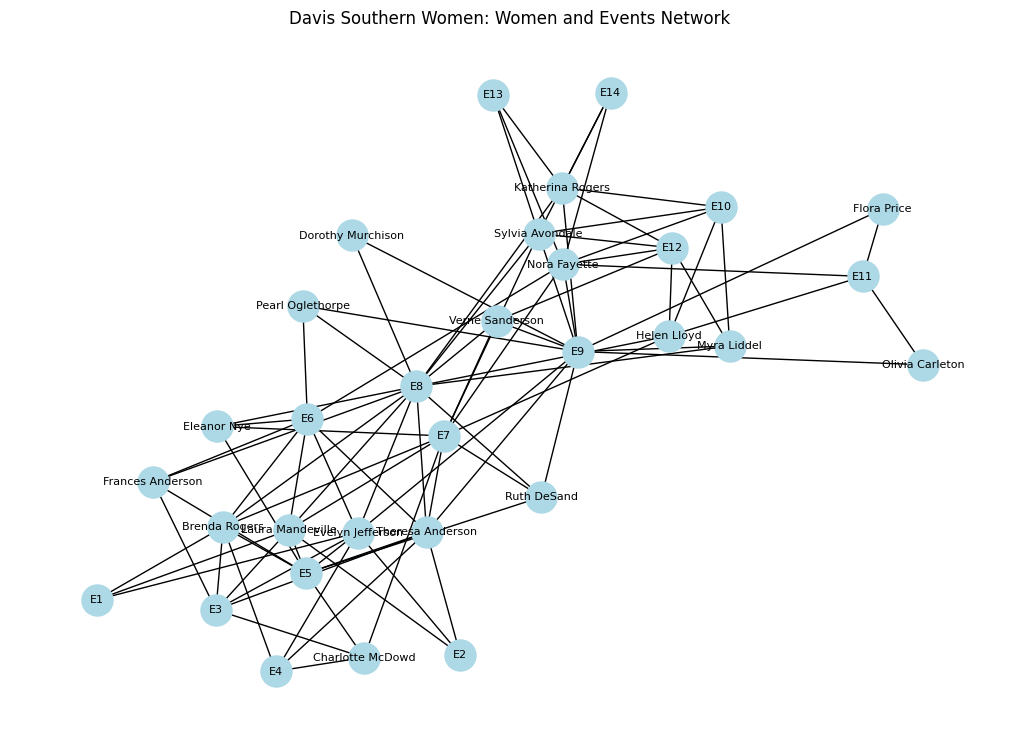

In [2]:
import matplotlib.pyplot as plt
import networkx as nx
from networkx.algorithms import bipartite

# Loaded the Davis Southern Women dataset: 18 women, 14 events
G = nx.davis_southern_women_graph()
women = G.graph["top"]  import matplotlib.pyplot as plt
import networkx as nx
from networkx.algorithms import bipartite

# Loaded the Davis Southern Women dataset: 18 women, 14 events
G = nx.davis_southern_women_graph()
women = G.graph["top"]
clubs = G.graph["bottom"]

# The raw connections: 18x14 matrix of attendance
print("Biadjacency Matrix (Women vs. Events):")
print(bipartite.biadjacency_matrix(G, women, clubs).toarray())


W = bipartite.projected_graph(G, women)
print("\nNumber of Friends per Woman:")
for w in women:
    print(f"{w}: {W.degree(w)} friends")

# Women’s relationships: weighted (total meetings)
W_weighted = bipartite.weighted_projected_graph(G, women)
print("\nTotal Event Co-occurrences per Woman:")
for w in women:
    meetings = W_weighted.degree(w, weight='weight')
    print(f"{w}: {meetings} friend meetings")


E = bipartite.projected_graph(G, clubs)
print("\nNumber of Shared Attendees per Event:")
for e in clubs:
    print(f"{e}: {E.degree(e)} events with shared women")


E_weighted = bipartite.weighted_projected_graph(G, clubs)
print("\nTotal Shared Women per Event:")
for e in clubs:
    shared = E_weighted.degree(e, weight='weight')
    print(f"{e}: {shared} total shared attendees")

# Visualize the network
pos = nx.spring_layout(G, seed=648)
plt.figure(figsize=(10, 7))
nx.draw(G, pos, node_color='lightblue', with_labels=True, node_size=500, font_size=8)
plt.title("Davis Southern Women: Women and Events Network")
plt.show()
clubs = G.graph["bottom"]


print("Biadjacency Matrix (Women vs. Events):")
print(bipartite.biadjacency_matrix(G, women, clubs).toarray())


W = bipartite.projected_graph(G, women)
print("\nNumber of Friends per Woman:")
for w in women:
    print(f"{w}: {W.degree(w)} friends")


W_weighted = bipartite.weighted_projected_graph(G, women)
print("\nTotal Event Co-occurrences per Woman:")
for w in women:
    meetings = W_weighted.degree(w, weight='weight')
    print(f"{w}: {meetings} friend meetings")


E = bipartite.projected_graph(G, clubs)
print("\nNumber of Shared Attendees per Event:")
for e in clubs:
    print(f"{e}: {E.degree(e)} events with shared women")


E_weighted = bipartite.weighted_projected_graph(G, clubs)
print("\nTotal Shared Women per Event:")
for e in clubs:
    shared = E_weighted.degree(e, weight='weight')
    print(f"{e}: {shared} total shared attendees")

# Visualize the network
pos = nx.spring_layout(G, seed=648)
plt.figure(figsize=(10, 7))
nx.draw(G, pos, node_color='lightblue', with_labels=True, node_size=500, font_size=8)
plt.title("Davis Southern Women: Women and Events Network")
plt.show()